In [8]:
import sys, os

use_colab = False
if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    cur_path = os.path.join('/content/drive/MyDrive/temp')
    os.chdir(cur_path)

else:
    cur_path = os.path.join(os.path.dirname(os.getcwd()))
    os.chdir(cur_path)
    # insert the path for my py. files
    sys.path.insert(0, os.path.dirname(os.getcwd()))
    print('cur_path',cur_path)

cur_path d:\GAN_simulated_data


In [2]:
import torch

c:\Users\KK\Anaconda3\envs\py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\KK\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\KK\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1060 6GB


# Data

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore

In [12]:
df = pd.read_csv(r'.\simulated_tunnel_data\data\Generated_1000.csv')

In [22]:
df.head()

,Torque cutting wheel (MN*m),Pressure force cutting wheel (kN),Thrust force (kN),Torque screw (kN*m),Cutting wheel speed of rotation (rpm),Thrust pressure (bar),Earth pressure (bar),Pressure foam lance (bar),Excavated material flow (t/h),Penetration rate (mm/rpm)
0,5.192523,13259.400660,29432.59783,4.937439,2.322215,211.071614,2.863265,1.159581,74.221613,4.058448
1,7.131947,10016.154310,35144.58312,7.834469,2.066133,293.799659,2.543668,1.362722,138.578558,6.290413
2,8.211371,6905.966608,26257.50990,23.948350,0.431922,247.550588,1.787373,1.151617,166.315294,38.713720
3,3.276164,3574.715084,17864.85893,10.238245,0.163730,178.021944,1.649984,1.158939,208.379310,280.170313
4,7.087181,11164.927760,41760.73426,6.831969,2.148862,332.441570,1.913249,1.319241,105.473088,6.046669


In [13]:
df.describe()

,Torque cutting wheel (MN*m),Pressure force cutting wheel (kN),Thrust force (kN),Torque screw (kN*m),Cutting wheel speed of rotation (rpm),Thrust pressure (bar),Earth pressure (bar),Pressure foam lance (bar),Excavated material flow (t/h),Penetration rate (mm/rpm)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.624343,9405.162502,31677.049227,12.325617,1.911390,246.746560,2.265582,1.871105,110.627313,12.890867
std,1.367224,2685.668086,6340.097776,8.626732,0.587964,50.964787,0.383756,0.629716,45.408946,28.971701
min,2.042111,1869.296364,9355.773504,-0.481435,0.163730,97.297009,1.304417,0.280003,26.055512,0.961888
25%,5.921151,7332.639968,27100.082980,5.987219,1.968458,207.847763,1.994089,1.409762,78.563138,4.442486
50%,7.087101,9382.328849,31872.265445,11.192735,2.060823,241.069259,2.206824,1.825761,104.641593,6.339901
75%,7.657997,11511.936825,36171.521402,16.601078,2.146446,286.201557,2.516141,2.115889,133.743497,8.497851
max,8.891578,16230.916050,46124.044570,56.646805,4.387570,345.378401,3.097053,4.311485,350.364130,306.711684


In [14]:
df_1 = df.apply(zscore)
df_1.describe()

,Torque cutting wheel (MN*m),Pressure force cutting wheel (kN),Thrust force (kN),Torque screw (kN*m),Cutting wheel speed of rotation (rpm),Thrust pressure (bar),Earth pressure (bar),Pressure foam lance (bar),Excavated material flow (t/h),Penetration rate (mm/rpm)
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.415845e-16,-3.552714e-18,4.440892e-16,8.526513e-17,-1.776357e-17,1.563194e-16,1.598721e-16,1.811884e-16,-1.154632e-17,-2.309264e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.353163e+00,-2.807360e+00,-3.522413e+00,-1.485320e+00,-2.973882e+00,-2.933875e+00,-2.505881e+00,-2.527961e+00,-1.863380e+00,-4.119519e-01
25%,-5.145782e-01,-7.720833e-01,-7.222691e-01,-7.351069e-01,9.710805e-02,-7.636304e-01,-7.078182e-01,-7.329864e-01,-7.064736e-01,-2.917540e-01
50%,3.386350e-01,-8.506292e-03,3.080613e-02,-1.313880e-01,2.542806e-01,-1.114523e-01,-1.531891e-01,-7.204339e-02,-1.318840e-01,-2.262292e-01
75%,7.564022e-01,7.848433e-01,7.092511e-01,4.958542e-01,3.999803e-01,7.745493e-01,6.532399e-01,3.889158e-01,5.093215e-01,-1.517072e-01
max,1.659106e+00,2.542819e+00,2.279811e+00,5.140228e+00,4.213559e+00,1.936262e+00,2.167751e+00,3.877303e+00,5.282148e+00,1.014672e+01


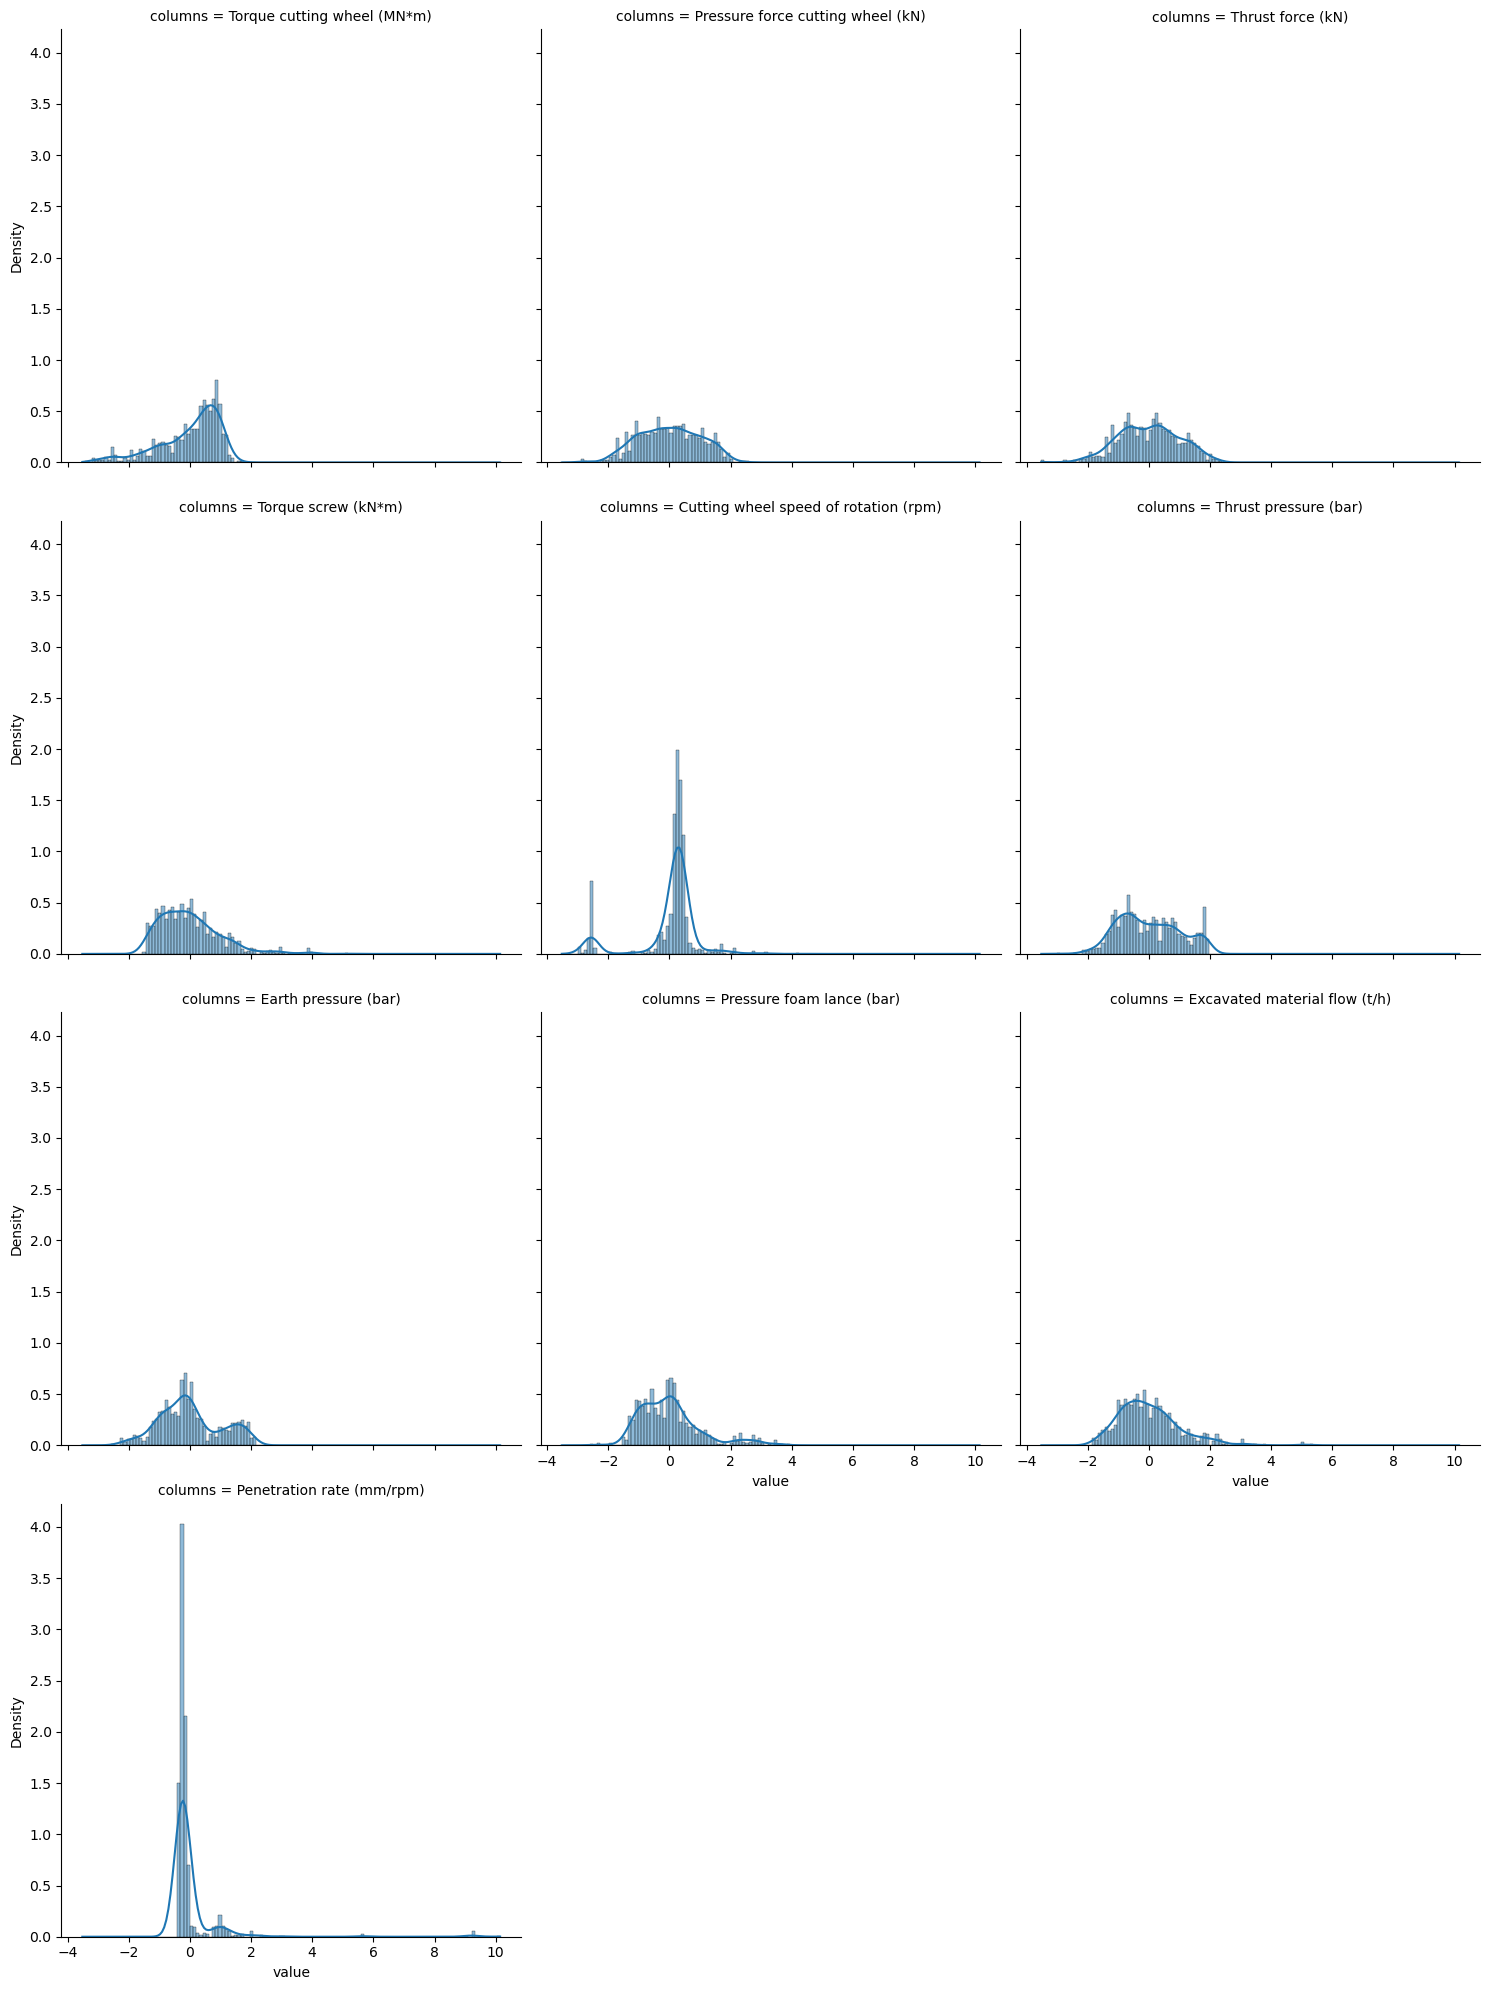

In [15]:
dfm = df_1.melt(var_name='columns')
g = sns.displot(data=dfm, x='value', col='columns', col_wrap=3, common_norm=False, kde=True, stat='density')

In [17]:
df.shape

(1000, 10)

# model

- Time-series Generative Adversarial Networks (TimeGAN)： https://github.com/jsyoon0823/TimeGAN

In [18]:
import torch
import torch.nn as nn
import time as t

In [19]:
# 1. TimeGAN model
from time_gan_model.timegan import timegan
# 2. Data loading
from time_gan_model.data_loading import real_data_loading, sine_data_generation
# # 3. Metrics
# from metrics.discriminative_metrics import discriminative_score_metrics
# from metrics.predictive_metrics import predictive_score_metrics
# from metrics.visualization_metrics import visualization

d:\GAN_simulated_data


In [20]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 1000
parameters['batch_size'] = 128

In [21]:
generated_data = timegan(df, parameters)   

ValueError: not enough values to unpack (expected 3, got 2)